In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("..")  

#for development purposes
%reload_ext autoreload
%autoreload 2

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

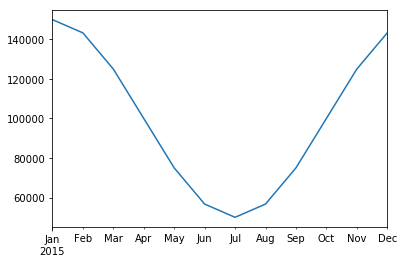

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

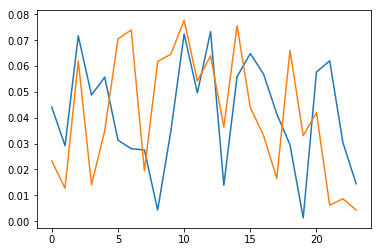

In [3]:
DWL =  np.random.rand(24) * 10 #daily load working
DWL = DWL / DWL.sum() # normalized

DNWL = np.random.rand(24) * 5 #daily load non working
DNWL = DNWL / DNWL.sum() #normalized daily load non working

plt.plot(DNWL)
plt.plot(DWL)

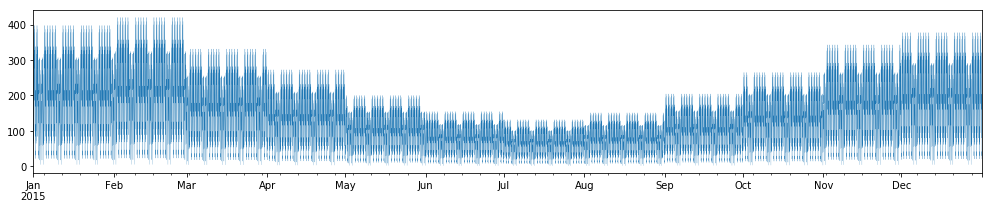

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name='House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the sum of total sum of energy is the same

In [5]:
print 'error = {:.2f}'.format(Load1.sum() - ML.sum())

error = 0.00


## Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,4277.573642,4074.011124,3564.644702,2806.980696,2185.032693,1591.522400,1395.406753,1651.847710,2105.235522,2851.715761,3587.667228,3999.271202
1,2528.857850,2406.011264,2107.381541,1650.526485,1301.002495,935.827552,818.870327,983.535853,1237.894863,1685.905233,2125.588918,2346.903160
2,9667.038847,9229.467640,8055.865705,6423.782062,4855.136121,3642.202835,3208.112518,3670.400682,4817.836547,6444.692564,8066.627120,9194.531975
3,3420.655176,3247.009290,2850.545980,2205.892809,1787.389084,1250.713204,1089.476361,1351.235877,1654.419607,2280.436784,2888.909411,3122.466926
4,6029.629121,5747.874436,5024.690934,3975.201406,3060.870504,2253.888704,1979.550307,2313.966262,2981.401054,4019.752747,5047.618908,5673.441467
5,9107.169973,8724.040279,7589.308311,6155.607812,4466.581507,3490.151441,3093.011769,3376.659974,4616.705859,6071.446649,7545.995475,8864.650304
6,9374.194245,8983.215204,7811.828537,6348.170016,4585.056368,3599.331765,3191.921327,3466.224962,4761.127512,6249.462830,7761.029712,9148.127611
7,3229.338724,3080.284477,2691.115603,2135.625620,1632.519366,1210.872600,1064.692700,1234.156993,1601.719215,2152.892482,2700.001849,3051.436325
8,7108.630920,6825.777001,5923.859100,4862.597065,3426.634465,2757.030771,2453.616664,2590.477623,3646.947798,4739.087280,5860.295825,7032.127690


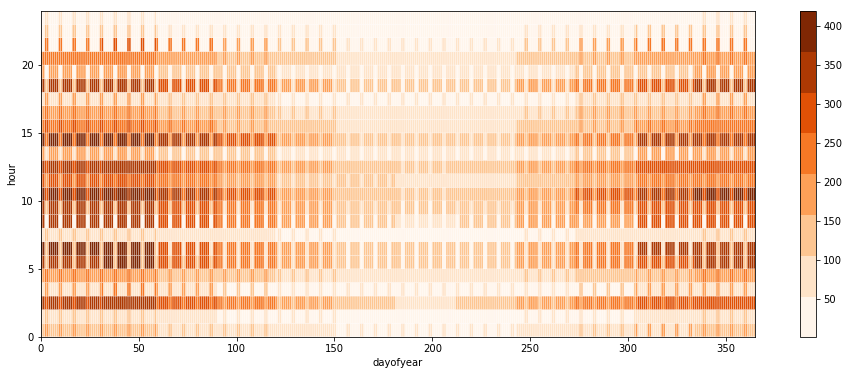

In [7]:
el.plot_heatmap(Load1)

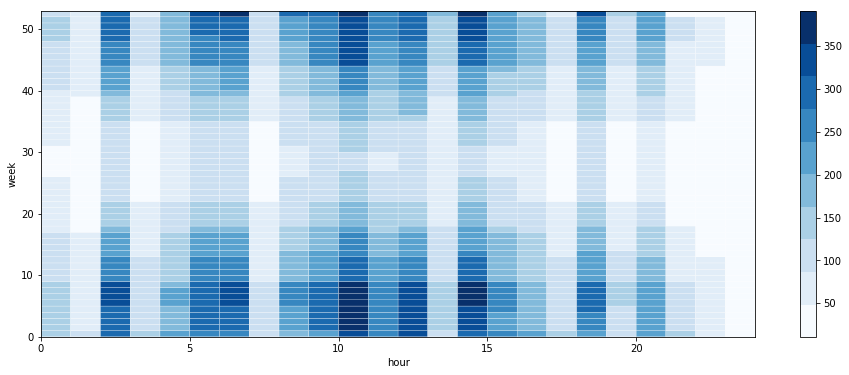

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

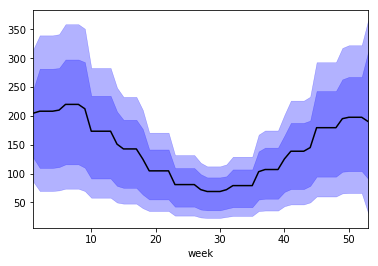

In [9]:
el.plot_percentiles(Load1, x='week', zz='hour')

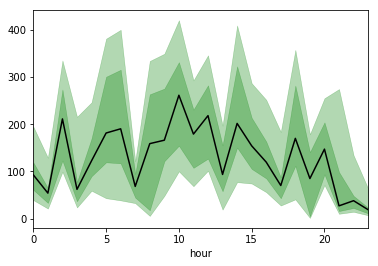

In [10]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

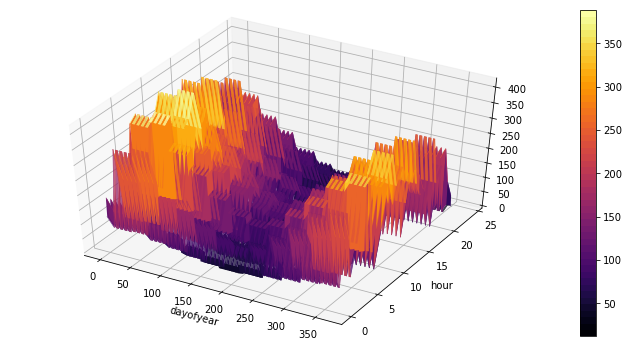

In [11]:
el.plot_3d(Load1, bins=50, palette='inferno')

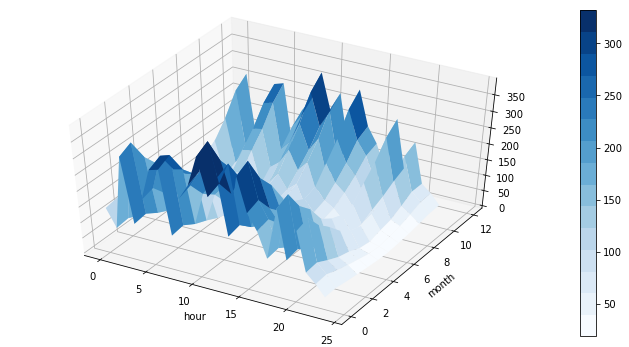

In [12]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

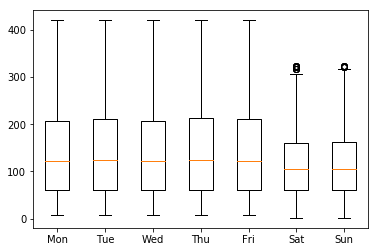

In [13]:
el.plot_boxplot(Load1, by='day')

### Rugplot

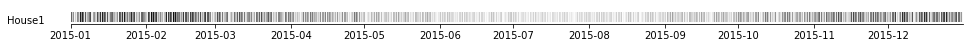

In [14]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

In [15]:
df_many = pd.concat([Load1, Load1['Jun 2015':'Nov 2015']], axis=1)

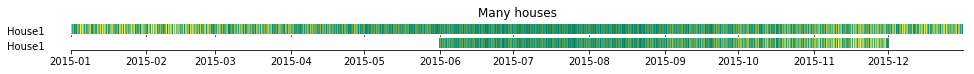

In [16]:
#It also accepts a dataframe of timeseries
el.plot_rug(df_many, cmap='summer', fig_title='Many houses')

## Archetypes

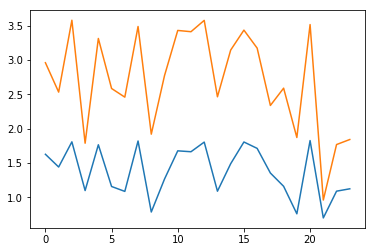

In [17]:
plt.plot(el.get_load_archetypes(Load1,2))

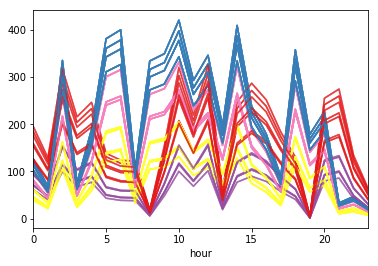

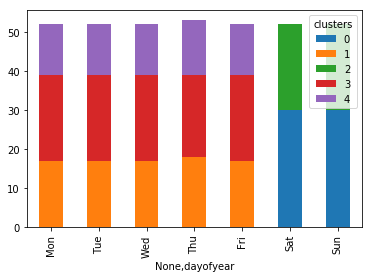

In [18]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [19]:
el.get_LDC(Load1)

array([[  1.00000000e+00,   9.97031963e-01,   9.97031963e-01, ...,
          2.28310502e-03,   2.28310502e-03,   1.11022302e-16],
       [  1.73849252e+00,   2.15700910e+00,   2.57552568e+00, ...,
          4.18999520e+02,   4.19418036e+02,   4.19836553e+02]])

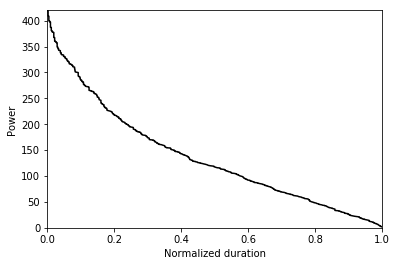

In [20]:
el.plot_LDC(Load1)

# Add noise to a load

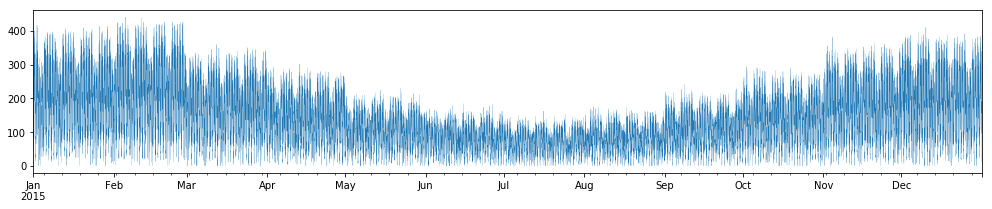

In [21]:
Load1_noise = el.add_noise(Load1, 3, 10) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

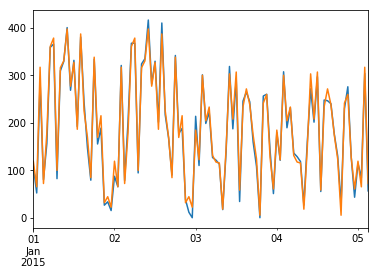

In [22]:
Load1_noise[0:100].plot()
Load1[0:100].plot()

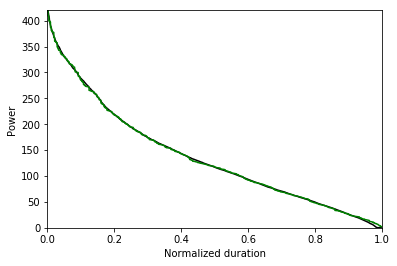

In [23]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1,color='g')

## Gather statistics

Check which statistics are gathered

In [24]:
from enload.stats import all_stats_desc
all_stats_desc

{'Average': <function enload.stats.get_mean>,
 'Biggest duration of consecitive zero load': <function enload.stats.<lambda>>,
 'Load Factor (peakiness)': <function enload.stats.get_lf>,
 'Load ratio (max/min)': <function enload.stats.get_load_ratio>,
 'Max': <function numpy.core.fromnumeric.amax>,
 'Min (2%)': <functools.partial at 0x7f44d1bbf7e0>,
 'Periodicity': <function enload.stats.<lambda>>,
 'Ramps (98%)': <functools.partial at 0x7f44d1bbf520>,
 'Sum': <function numpy.core.fromnumeric.sum>,
 'Total Zero load duration': <functools.partial at 0x7f44d1bbfb50>,
 'Trend': <function enload.stats.get_trend>}

In [25]:
el.get_load_stats(Load1)

,2015
Average,136.986
Biggest duration of consecitive zero load,0
Load Factor (peakiness),0.326285
Load ratio (max/min),241.495
Max,419.837
Min (2%),1.73849
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-232.302497473, 218.731344192)"
Sum,1.2e+06
Total Zero load duration,0


We can also check the statistics per defined time period. Example for month ('m'):

In [26]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Average,201.613,213.246,168.011,138.889,100.806,78.7482,67.2043,76.208,104.167,134.409,173.611,192.609
Biggest duration of consecitive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.507477,0.507926,0.507477,0.509782,0.504335,0.509782,0.510619,0.504335,0.509782,0.507477,0.506535,0.510619
Load ratio (max/min),75.7054,75.7054,75.7054,75.7054,75.7054,75.7054,75.7054,75.7054,75.7054,75.7054,75.7054,75.7054
Max,397.285,419.837,331.071,272.448,199.88,154.474,131.613,151.106,204.336,264.856,342.743,377.207
Min (2%),5.24777,5.54566,4.37314,3.59879,2.64023,2.04047,1.73849,1.99597,2.69909,3.49851,4.52732,4.98256
Periodicity,"(124.0, 23.0)","(112.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)"
Ramps (98%),"(-278.450468365, 253.538746952)","(-294.256729998, 267.930892858)","(-232.042056971, 211.282289126)","(-190.954355163, 173.870520733)","(-140.092681125, 127.559213809)","(-108.268693896, 98.5823767712)","(-92.2456423405, 83.9928361697)","(-105.907694341, 96.4326053151)","(-143.215766373, 130.40289055)","(-185.633645577, 169.025831301)","(-240.223026928, 218.731344192)","(-264.378354336, 240.725602198)"
Sum,150000,143301,125000,100000,75000,56698.7,50000,56698.7,75000,100000,125000,143301
Total Zero load duration,0,0,0,0,0,0,0,0,0,0,0,0


## Load Shifting

In [27]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

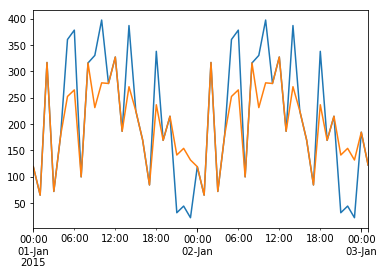

In [28]:
Load1[0:50].plot()
Load1_DR[0:50].plot()

In [29]:
el.get_load_stats(Load1)

,2015
Average,136.986
Biggest duration of consecitive zero load,0
Load Factor (peakiness),0.326285
Load ratio (max/min),241.495
Max,419.837
Min (2%),1.73849
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-232.302497473, 218.731344192)"
Sum,1.2e+06
Total Zero load duration,0


In [30]:
el.get_load_stats(Load1_DR) #it is less peaky as expected after the peak shaving

,2015
Average,134.662
Biggest duration of consecitive zero load,0
Load Factor (peakiness),0.389616
Load ratio (max/min),16.0465
Max,345.627
Min (2%),21.5391
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-163.14636821, 187.891798954)"
Sum,1.17964e+06
Total Zero load duration,0


## Sample new loads from load duration curve

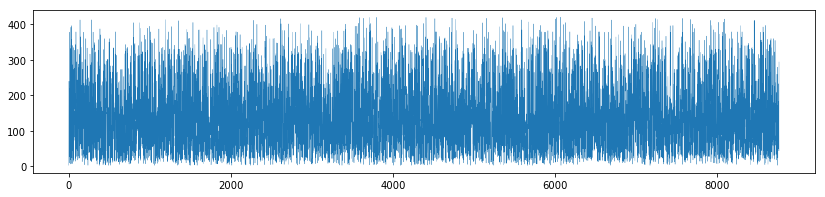

In [31]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

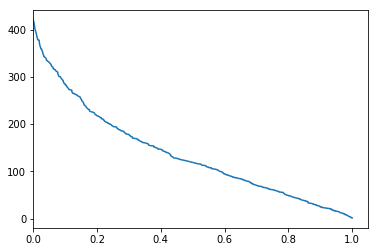

In [32]:
plt.plot(*el.get_LDC(Load1a))
plt.xlim(xmin=0);